Используется устройство: cpu


100%|██████████| 9.91M/9.91M [00:01<00:00, 6.12MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.45MB/s]


Размер тренировочного датасета: 60000
Размер тестового датасета: 10000
Размер входных данных: 784
Размер сжатого представления: 32
Степень сжатия: 24.5x
Начало обучения...


Epoch 1/20: 100%|██████████| 469/469 [00:19<00:00, 24.00it/s, Loss=0.042705]


Epoch [1/20], Средняя потеря: 0.061149


Epoch 2/20: 100%|██████████| 469/469 [00:22<00:00, 21.13it/s, Loss=0.031345]


Epoch [2/20], Средняя потеря: 0.033211


Epoch 3/20: 100%|██████████| 469/469 [00:21<00:00, 22.17it/s, Loss=0.025192]


Epoch [3/20], Средняя потеря: 0.026826


Epoch 4/20: 100%|██████████| 469/469 [00:20<00:00, 22.38it/s, Loss=0.021846]


Epoch [4/20], Средняя потеря: 0.023944


Epoch 5/20: 100%|██████████| 469/469 [00:21<00:00, 21.78it/s, Loss=0.020101]


Epoch [5/20], Средняя потеря: 0.021632


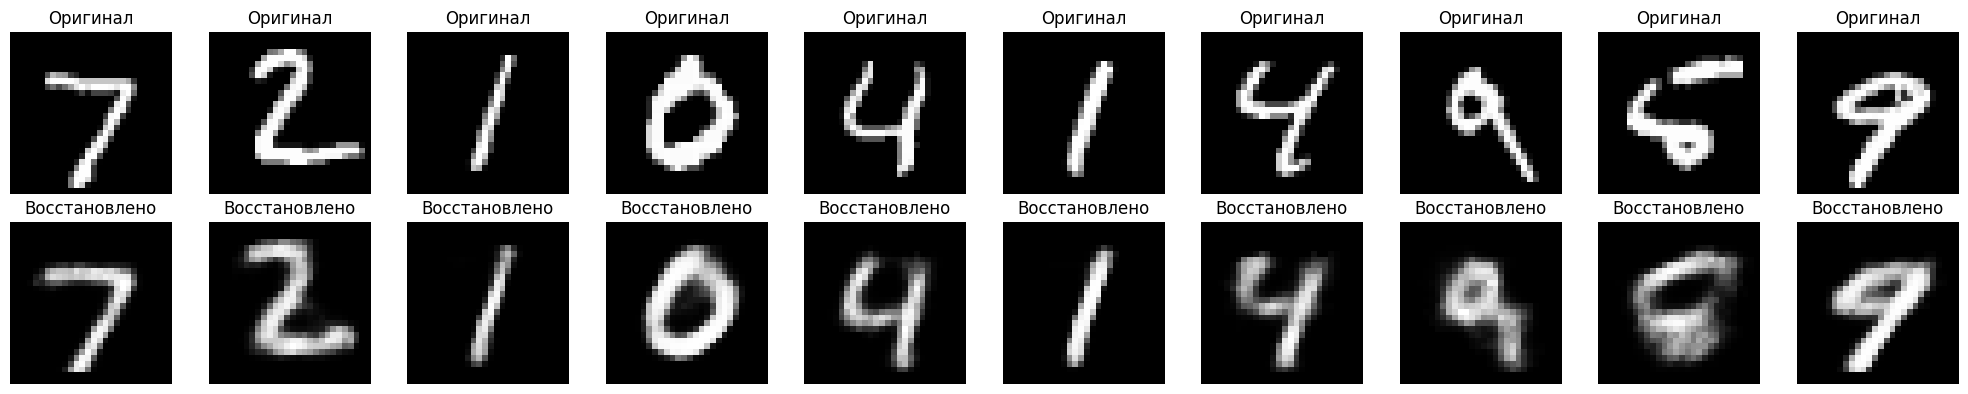

Epoch 6/20: 100%|██████████| 469/469 [00:19<00:00, 23.77it/s, Loss=0.018311]


Epoch [6/20], Средняя потеря: 0.019846


Epoch 7/20: 100%|██████████| 469/469 [00:20<00:00, 23.08it/s, Loss=0.016954]


Epoch [7/20], Средняя потеря: 0.018475


Epoch 8/20: 100%|██████████| 469/469 [00:20<00:00, 22.77it/s, Loss=0.016609]


Epoch [8/20], Средняя потеря: 0.017161


Epoch 9/20: 100%|██████████| 469/469 [00:20<00:00, 23.10it/s, Loss=0.016486]


Epoch [9/20], Средняя потеря: 0.016169


Epoch 10/20: 100%|██████████| 469/469 [00:20<00:00, 23.35it/s, Loss=0.015099]


Epoch [10/20], Средняя потеря: 0.015316


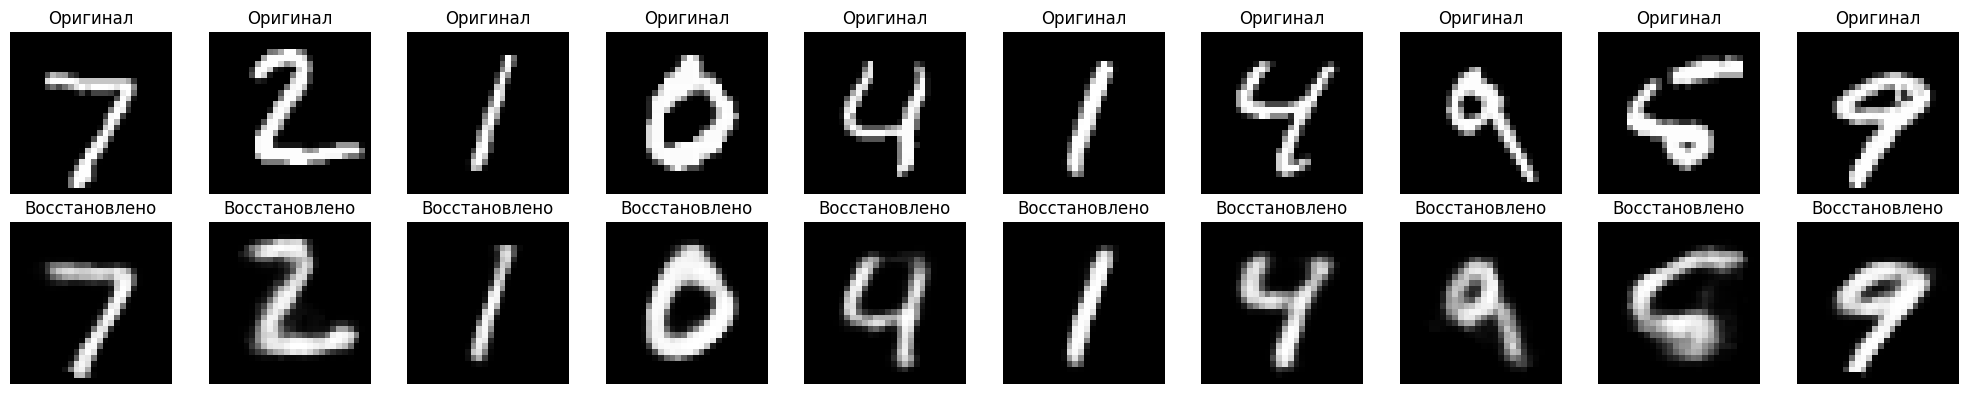

Epoch 11/20: 100%|██████████| 469/469 [00:19<00:00, 23.82it/s, Loss=0.013950]


Epoch [11/20], Средняя потеря: 0.014604


Epoch 12/20: 100%|██████████| 469/469 [00:20<00:00, 22.56it/s, Loss=0.014169]


Epoch [12/20], Средняя потеря: 0.014032


Epoch 13/20: 100%|██████████| 469/469 [00:20<00:00, 23.11it/s, Loss=0.013311]


Epoch [13/20], Средняя потеря: 0.013465


Epoch 14/20: 100%|██████████| 469/469 [00:21<00:00, 22.14it/s, Loss=0.013738]


Epoch [14/20], Средняя потеря: 0.012976


Epoch 15/20: 100%|██████████| 469/469 [00:21<00:00, 21.79it/s, Loss=0.012238]


Epoch [15/20], Средняя потеря: 0.012526


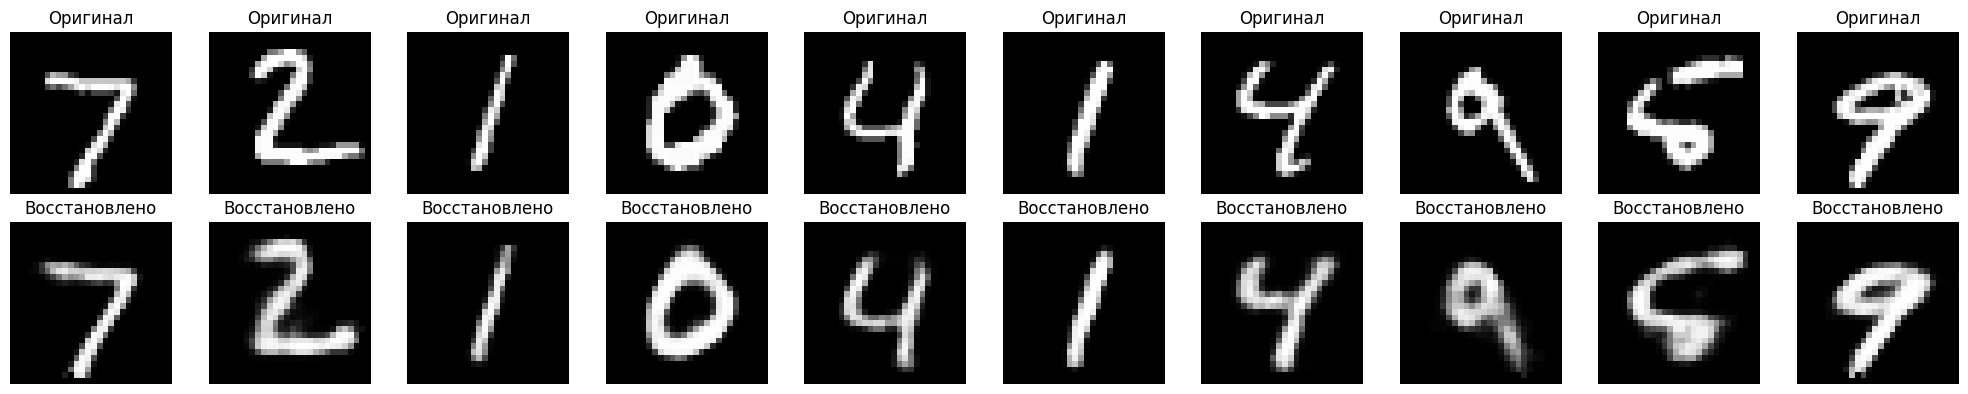

Epoch 16/20: 100%|██████████| 469/469 [00:21<00:00, 22.13it/s, Loss=0.011156]


Epoch [16/20], Средняя потеря: 0.012086


Epoch 17/20: 100%|██████████| 469/469 [00:21<00:00, 22.00it/s, Loss=0.010917]


Epoch [17/20], Средняя потеря: 0.011704


Epoch 18/20: 100%|██████████| 469/469 [00:21<00:00, 21.81it/s, Loss=0.011383]


Epoch [18/20], Средняя потеря: 0.011266


Epoch 19/20: 100%|██████████| 469/469 [00:21<00:00, 22.28it/s, Loss=0.010972]


Epoch [19/20], Средняя потеря: 0.010866


Epoch 20/20: 100%|██████████| 469/469 [00:20<00:00, 22.38it/s, Loss=0.010763]


Epoch [20/20], Средняя потеря: 0.010486


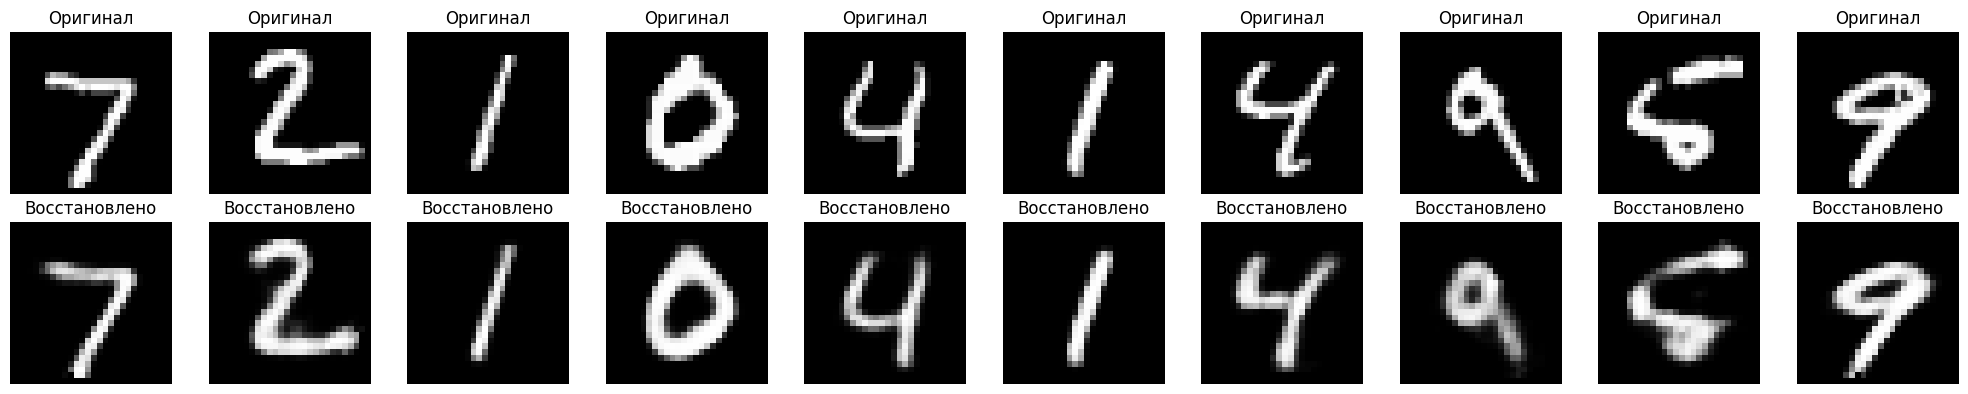

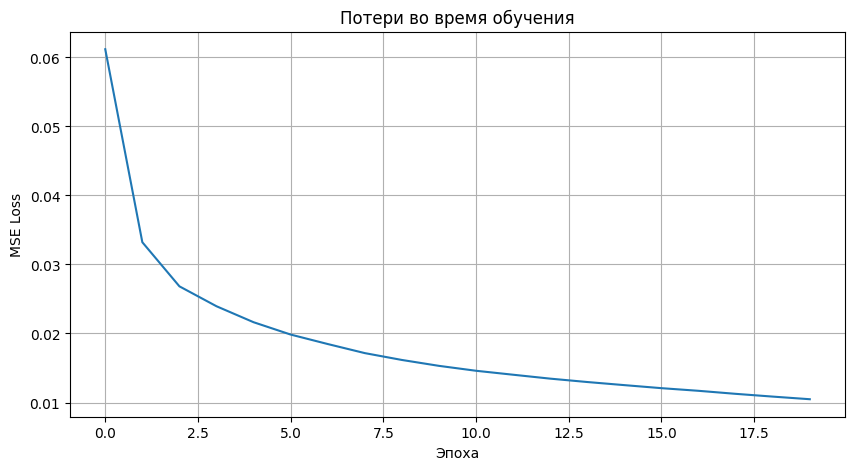


ДЕМОНСТРАЦИЯ РАБОТЫ АВТОКОДИРОВЩИКА


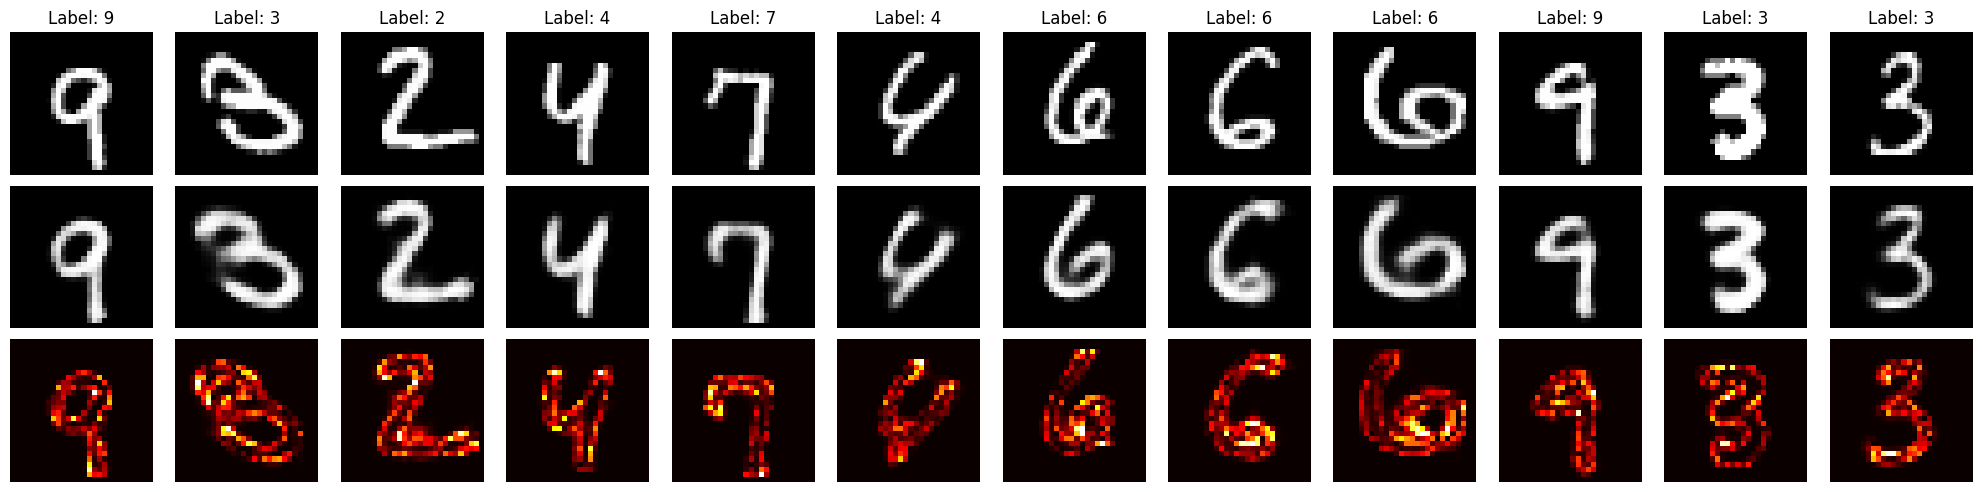

Размер оригинального изображения: 784 пикселей
Размер сжатого представления: 32 значений
Степень сжатия: 24.5x
Размер сжатых признаков: (512, 32)


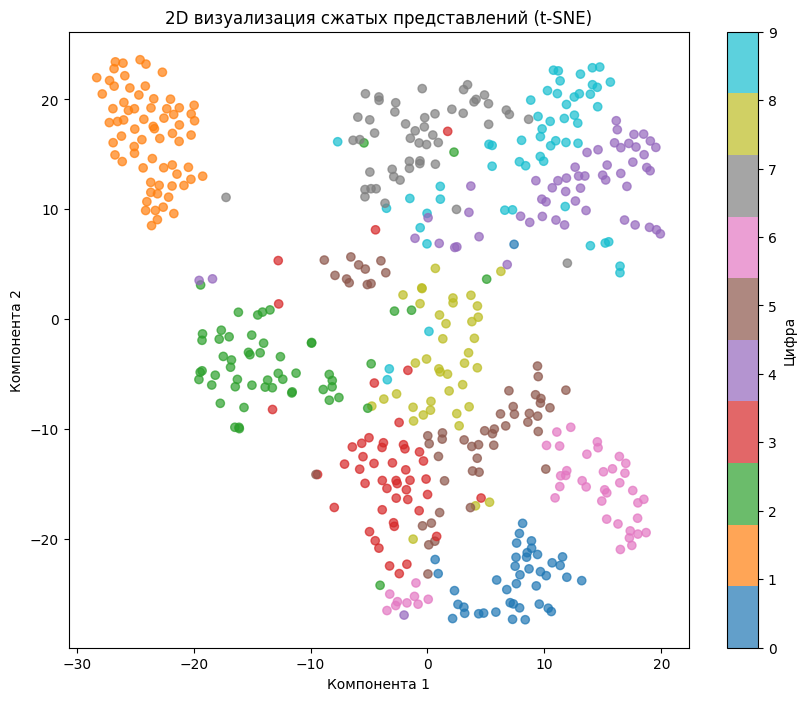


Эксперимент с разной степенью сжатия:


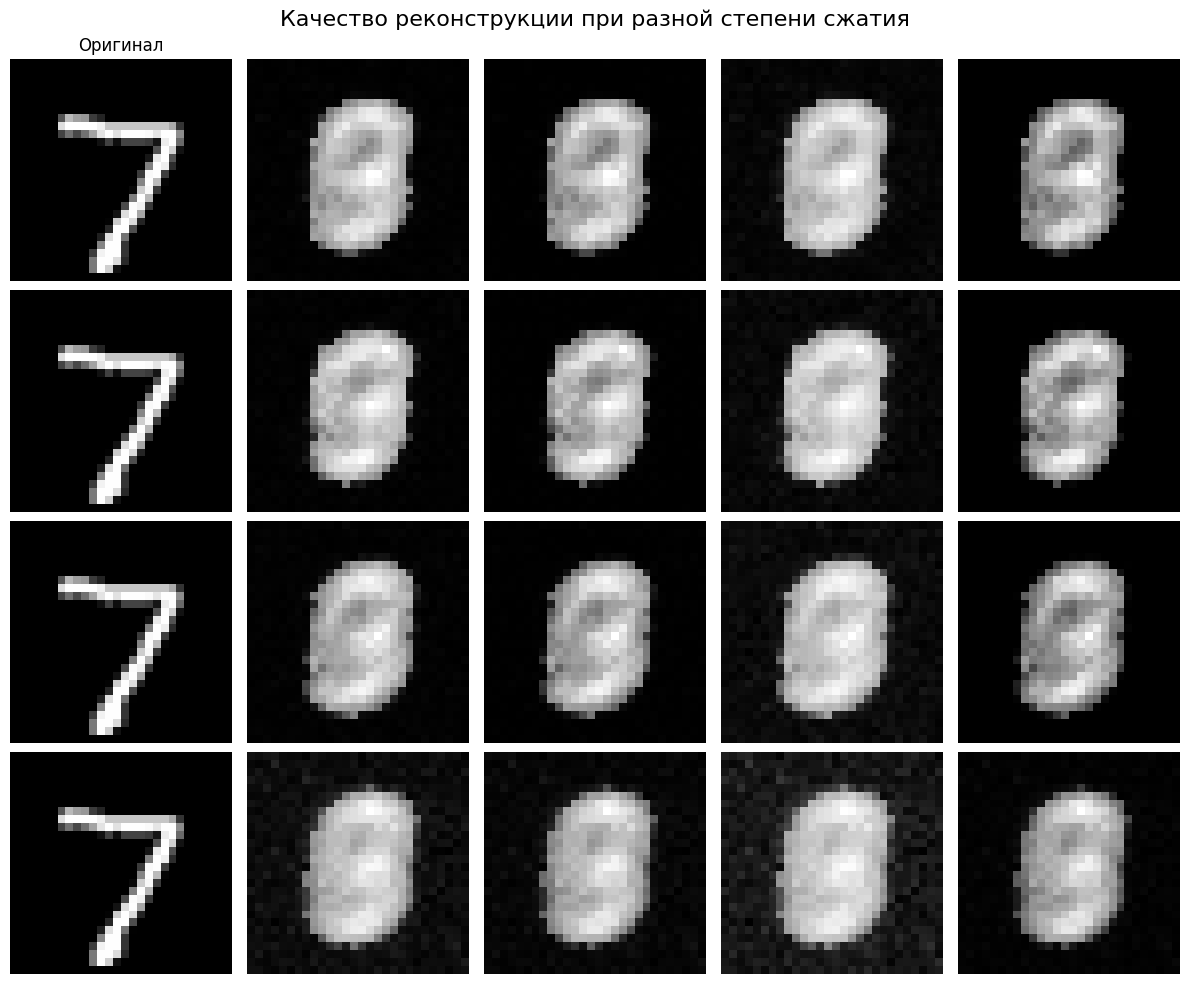


Демонстрация завершена!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Настройки устройства
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {device}")

## 1. Определение архитектуры автокодировщика
class Autoencoder(nn.Module):
    def __init__(self, input_dim=784, encoding_dim=32):
        super(Autoencoder, self).__init__()

        # Кодировщик
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_dim),  # Бутылочное горлышко
        )

        # Декодировщик
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
            nn.Sigmoid()  # Выход в диапазоне [0, 1] для изображений
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        """Функция только для кодирования"""
        return self.encoder(x)

## 2. Загрузка и подготовка данных
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Загрузка MNIST датасета
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                         download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128,
                                         shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128,
                                        shuffle=False)

print(f"Размер тренировочного датасета: {len(train_dataset)}")
print(f"Размер тестового датасета: {len(test_dataset)}")

## 3. Инициализация модели и оптимизатора
input_dim = 28 * 28  # Размер изображений MNIST
encoding_dim = 32     # Размер сжатого представления

model = Autoencoder(input_dim, encoding_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(f"Размер входных данных: {input_dim}")
print(f"Размер сжатого представления: {encoding_dim}")
print(f"Степень сжатия: {input_dim/encoding_dim:.1f}x")

## 4. Функция для визуализации результатов
def visualize_results(original, reconstructed, n=10):
    """Визуализация оригинальных и восстановленных изображений"""
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # Оригинальное изображение
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Оригинал")
        plt.axis('off')

        # Восстановленное изображение
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Восстановлено")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## 5. Обучение автокодировщика
def train_autoencoder(num_epochs=20):
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        # Progress bar
        pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')

        for batch_idx, (data, _) in enumerate(pbar):
            # Подготовка данных
            data = data.view(data.size(0), -1).to(device)

            # Прямой проход
            reconstructed = model(data)
            loss = criterion(reconstructed, data)

            # Обратный проход
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Обновление progress bar
            pbar.set_postfix({'Loss': f'{loss.item():.6f}'})

        # Средняя потеря за эпоху
        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Средняя потеря: {avg_loss:.6f}')

        # Визуализация после каждой 5-й эпохи
        if (epoch + 1) % 5 == 0:
            model.eval()
            with torch.no_grad():
                test_data, _ = next(iter(test_loader))
                test_data = test_data[:10].view(10, -1).to(device)
                reconstructed_data = model(test_data)

                visualize_results(test_data.cpu().numpy(),
                                reconstructed_data.cpu().numpy())

    return train_losses

## 6. Запуск обучения
print("Начало обучения...")
train_losses = train_autoencoder(num_epochs=20)

## 7. Визуализация процесса обучения
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Потери во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

## 8. Демонстрация работы обученного автокодировщика
def demonstrate_autoencoder():
    model.eval()

    # Берем несколько тестовых изображений
    test_iter = iter(test_loader)
    images, labels = next(test_iter)

    # Выбираем случайные изображения для демонстрации
    indices = np.random.choice(len(images), 12, replace=False)
    demo_images = images[indices]

    # Реконструкция
    with torch.no_grad():
        original_flat = demo_images.view(demo_images.size(0), -1).to(device)
        reconstructed_flat = model(original_flat)
        reconstructed_images = reconstructed_flat.view(demo_images.size())

        # Получаем сжатые представления
        compressed = model.encode(original_flat)

    # Визуализация
    fig, axes = plt.subplots(3, 12, figsize=(20, 5))

    for i in range(12):
        # Оригиналы
        axes[0, i].imshow(demo_images[i].squeeze(), cmap='gray')
        axes[0, i].set_title(f'Label: {labels[indices[i]].item()}')
        axes[0, i].axis('off')

        # Восстановленные
        axes[1, i].imshow(reconstructed_images[i].cpu().squeeze(), cmap='gray')
        axes[1, i].axis('off')

        # Разница
        diff = abs(demo_images[i].squeeze() - reconstructed_images[i].cpu().squeeze())
        axes[2, i].imshow(diff, cmap='hot')
        axes[2, i].axis('off')

    axes[0, 0].set_ylabel('Оригинал')
    axes[1, 0].set_ylabel('Восстановлено')
    axes[2, 0].set_ylabel('Разница')

    plt.tight_layout()
    plt.show()

    print(f"Размер оригинального изображения: {demo_images[0].numel()} пикселей")
    print(f"Размер сжатого представления: {compressed[0].numel()} значений")
    print(f"Степень сжатия: {demo_images[0].numel()/compressed[0].numel():.1f}x")

## 9. Демонстрация снижения размерности
def demonstrate_dimensionality_reduction():
    """Демонстрация работы кодировщика для снижения размерности"""
    from sklearn.manifold import TSNE
    import pandas as pd

    model.eval()

    # Берем подмножество тестовых данных
    test_features = []
    test_labels = []

    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            if i >= 4:  # Ограничиваем количество батчей
                break

            images_flat = images.view(images.size(0), -1).to(device)
            compressed = model.encode(images_flat)

            test_features.extend(compressed.cpu().numpy())
            test_labels.extend(labels.numpy())

    test_features = np.array(test_features)
    test_labels = np.array(test_labels)

    print(f"Размер сжатых признаков: {test_features.shape}")

    # Визуализация с помощью t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    features_2d = tsne.fit_transform(test_features)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1],
                         c=test_labels, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, label='Цифра')
    plt.title('2D визуализация сжатых представлений (t-SNE)')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.show()

## 10. Запуск демонстраций
print("\n" + "="*50)
print("ДЕМОНСТРАЦИЯ РАБОТЫ АВТОКОДИРОВЩИКА")
print("="*50)

# Демонстрация реконструкции
demonstrate_autoencoder()

# Демонстрация снижения размерности
demonstrate_dimensionality_reduction()

## 11. Эксперимент с разной степенью сжатия
def compression_experiment():
    """Эксперимент с разными размерами бутылочного горлышка"""
    encoding_dims = [2, 8, 32, 128]

    fig, axes = plt.subplots(len(encoding_dims), 5, figsize=(12, 10))

    for i, encoding_dim in enumerate(encoding_dims):
        # Создаем и обучаем модель с текущей размерностью
        test_model = Autoencoder(input_dim, encoding_dim).to(device)
        test_optimizer = optim.Adam(test_model.parameters(), lr=0.001)

        # Быстрое обучение (1 эпоха для демонстрации)
        test_model.train()
        for batch_idx, (data, _) in enumerate(train_loader):
            if batch_idx > 50:  # Ограничиваем количество батчей
                break
            data = data.view(data.size(0), -1).to(device)
            reconstructed = test_model(data)
            loss = criterion(reconstructed, data)
            test_optimizer.zero_grad()
            loss.backward()
            test_optimizer.step()

        # Тестирование
        test_model.eval()
        with torch.no_grad():
            test_data, _ = next(iter(test_loader))
            test_samples = test_data[:5].view(5, -1).to(device)
            reconstructed_samples = test_model(test_samples)

            for j in range(5):
                if i == 0:
                    axes[i, j].set_ylabel(f'Dim={encoding_dim}',
                                         rotation=0, ha='right')

                if j == 0:
                    # Оригинал в первом столбце
                    axes[i, j].imshow(test_samples[j].cpu().view(28, 28),
                                    cmap='gray')
                    if i == 0:
                        axes[i, j].set_title('Оригинал')
                else:
                    # Реконструкции
                    axes[i, j].imshow(reconstructed_samples[j-1].cpu().view(28, 28),
                                    cmap='gray')

                axes[i, j].axis('off')

    plt.suptitle('Качество реконструкции при разной степени сжатия', fontsize=16)
    plt.tight_layout()
    plt.show()

# Запуск эксперимента со сжатием
print("\nЭксперимент с разной степенью сжатия:")
compression_experiment()

print("\nДемонстрация завершена!")

device: cuda


100%|██████████| 9.91M/9.91M [00:52<00:00, 187kB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.24MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.6MB/s]


train: orig arch
Epoch [5/15], Train Loss: 0.020289, Test Loss: 0.018854
Epoch [10/15], Train Loss: 0.014336, Test Loss: 0.013710
Epoch [15/15], Train Loss: 0.011641, Test Loss: 0.011511
train: simple arch
Epoch [5/15], Train Loss: 0.011324, Test Loss: 0.010405
Epoch [10/15], Train Loss: 0.008297, Test Loss: 0.007897
Epoch [15/15], Train Loss: 0.007320, Test Loss: 0.007066
train: deep arch
Epoch [5/15], Train Loss: 0.021179, Test Loss: 0.020130
Epoch [10/15], Train Loss: 0.015939, Test Loss: 0.016029
Epoch [15/15], Train Loss: 0.013567, Test Loss: 0.014029
train: asymmetric (deep encode)
Epoch [5/15], Train Loss: 0.018669, Test Loss: 0.017479
Epoch [10/15], Train Loss: 0.013185, Test Loss: 0.012680
Epoch [15/15], Train Loss: 0.010412, Test Loss: 0.010102
train: asymmetric (deep decode)
Epoch [5/15], Train Loss: 0.012643, Test Loss: 0.011721
Epoch [10/15], Train Loss: 0.008148, Test Loss: 0.007892
Epoch [15/15], Train Loss: 0.006681, Test Loss: 0.006699
train: small latent space (8)
Epo

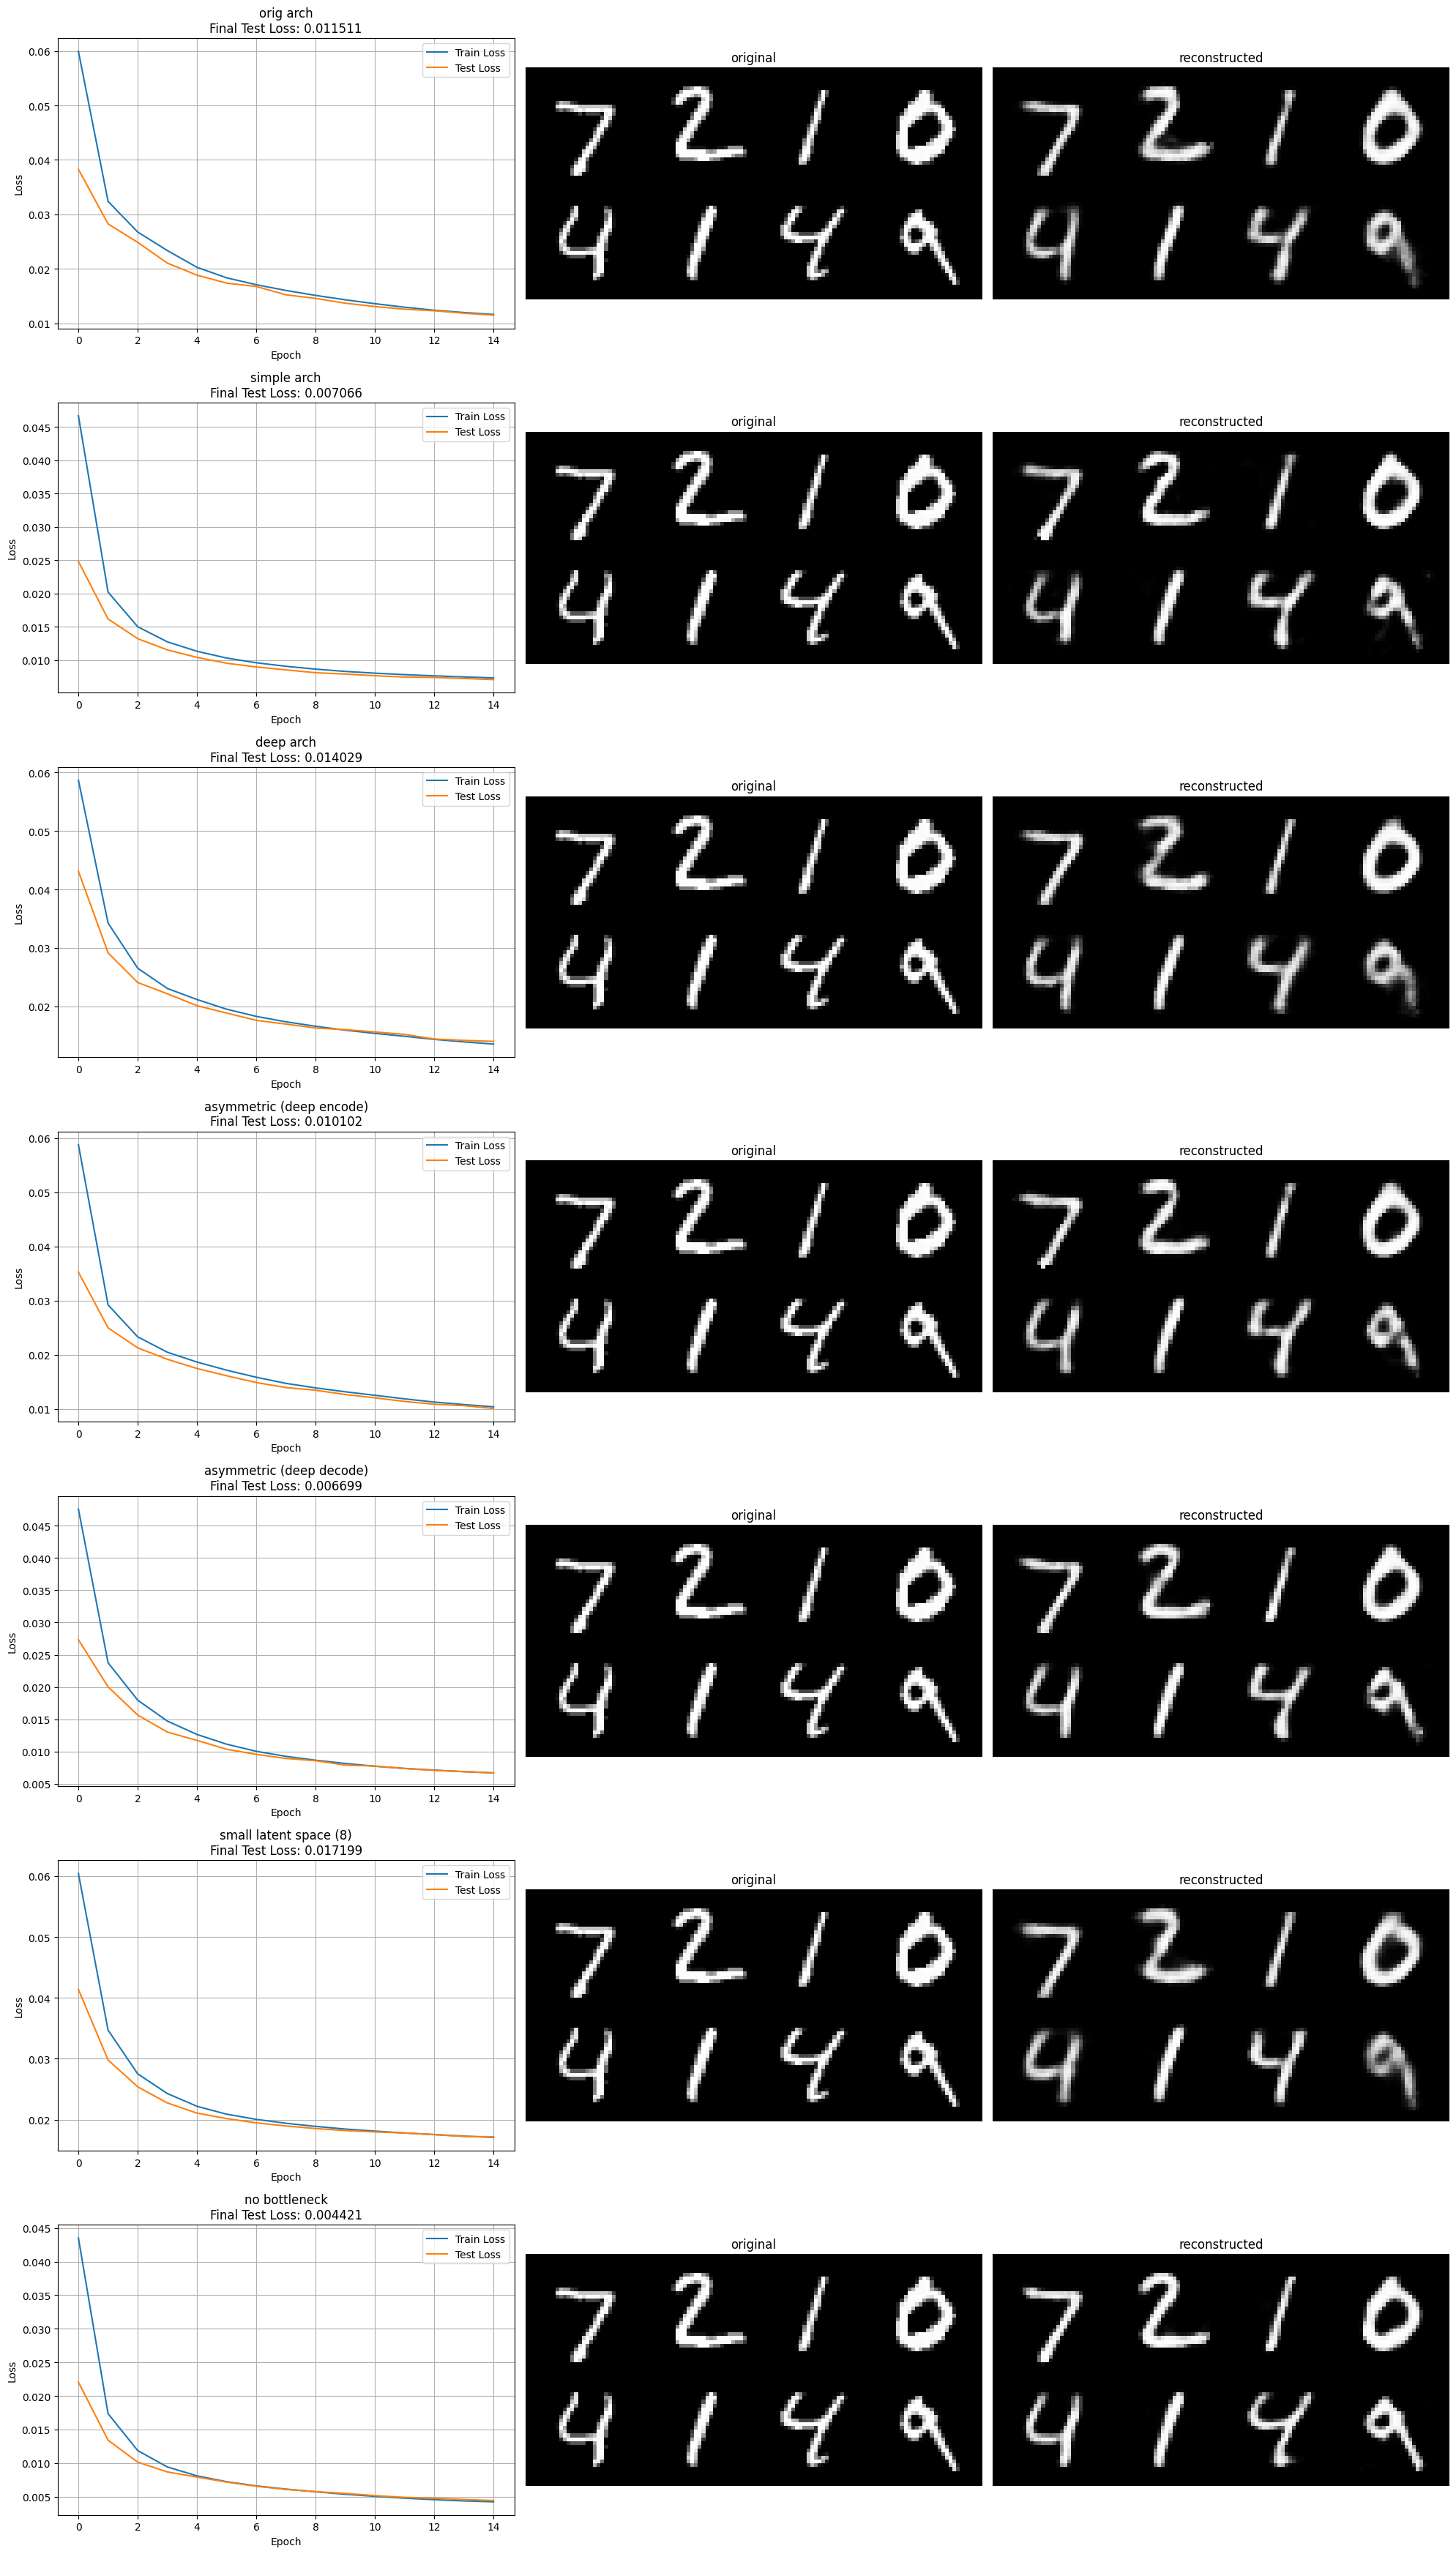

 1. no bottleneck                                 Test Loss: 0.004421
 2. asymmetric (deep decode)                      Test Loss: 0.006699
 3. simple arch                                   Test Loss: 0.007066
 4. asymmetric (deep encode)                      Test Loss: 0.010102
 5. orig arch                                     Test Loss: 0.011511
 6. deep arch                                     Test Loss: 0.014029
 7. small latent space (8)                        Test Loss: 0.017199

best model: no bottleneck
error: 0.004421

analyze latent space best model...


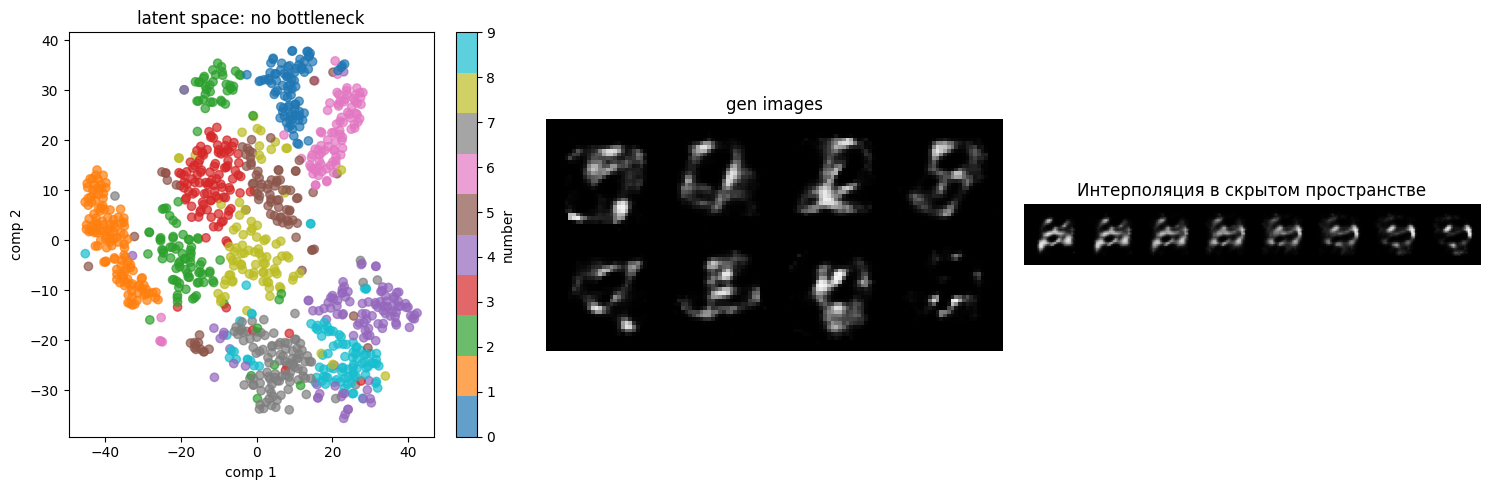


Тестирование размера скрытого представления: 2
Размер: 2, Потеря: 0.040138

Тестирование размера скрытого представления: 8
Размер: 8, Потеря: 0.022503

Тестирование размера скрытого представления: 16
Размер: 16, Потеря: 0.019492

Тестирование размера скрытого представления: 32
Размер: 32, Потеря: 0.018854

Тестирование размера скрытого представления: 64
Размер: 64, Потеря: 0.020390

Тестирование размера скрытого представления: 128
Размер: 128, Потеря: 0.020013

Тестирование размера скрытого представления: 256
Размер: 256, Потеря: 0.019209


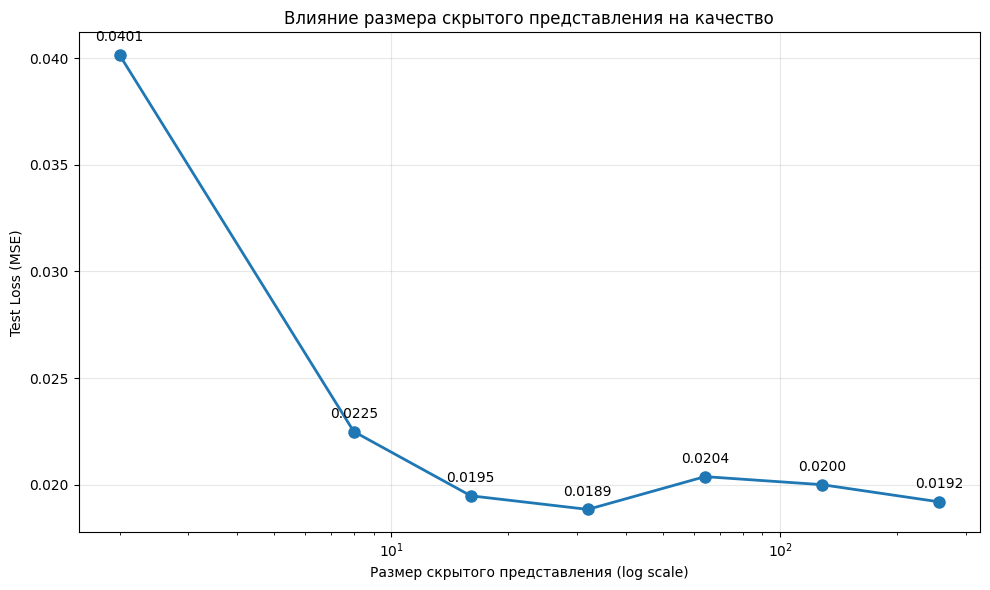

best acc: no bottleneck
worst acc: small latent space (8)
diff acc: 0.012778


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.manifold import TSNE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device: {device}")

class BaseAutoencoder(nn.Module):
    def __init__(self, input_dim=784, encoding_dim=32):
        super(BaseAutoencoder, self).__init__()
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        return self.encoder(x)

# 1. simple arch - some layers
class SimpleAutoencoder(BaseAutoencoder):
    def __init__(self, input_dim=784, encoding_dim=32):
        super(SimpleAutoencoder, self).__init__(input_dim, encoding_dim)

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim),
        )

        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

# 2. deep arch - many layers
class DeepAutoencoder(BaseAutoencoder):
    def __init__(self, input_dim=784, encoding_dim=32):
        super(DeepAutoencoder, self).__init__(input_dim, encoding_dim)

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_dim),
        )

        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.Sigmoid()
        )

# 3. assymetric, deep encode
class AsymmetricEncoderAutoencoder(BaseAutoencoder):
    def __init__(self, input_dim=784, encoding_dim=32):
        super(AsymmetricEncoderAutoencoder, self).__init__(input_dim, encoding_dim)

        # deep encode
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_dim),
        )

        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

# 4. assymetric, deep decode
class AsymmetricDecoderAutoencoder(BaseAutoencoder):
    def __init__(self, input_dim=784, encoding_dim=32):
        super(AsymmetricDecoderAutoencoder, self).__init__(input_dim, encoding_dim)

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim),
        )

        # deep decode
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.Sigmoid()
        )

# 5. no bottleneck arch
class NoBottleneckAutoencoder(BaseAutoencoder):
    def __init__(self, input_dim=784, encoding_dim=784):
        super(NoBottleneckAutoencoder, self).__init__(input_dim, encoding_dim)

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, encoding_dim),
        )

        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.Sigmoid()
        )

# 6. small latent space arch
class SmallEncodingAutoencoder(BaseAutoencoder):
    def __init__(self, input_dim=784, encoding_dim=8):
        super(SmallEncodingAutoencoder, self).__init__(input_dim, encoding_dim)

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_dim),
        )

        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
            nn.Sigmoid()
        )

# 7. orig arch
class OriginalAutoencoder(BaseAutoencoder):
    def __init__(self, input_dim=784, encoding_dim=32):
        super(OriginalAutoencoder, self).__init__(input_dim, encoding_dim)

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_dim),
        )

        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
            nn.Sigmoid()
        )

def train_and_evaluate_model(model_class, model_name, encoding_dim=32, num_epochs=15):
    print(f"train: {model_name}")

    # init
    model = model_class(input_dim=784, encoding_dim=encoding_dim).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for data, _ in train_loader:
            data = data.view(data.size(0), -1).to(device)

            reconstructed = model(data)
            loss = criterion(reconstructed, data)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for data, _ in test_loader:
                data = data.view(data.size(0), -1).to(device)
                reconstructed = model(data)
                loss = criterion(reconstructed, data)
                test_loss += loss.item()

        test_losses.append(test_loss / len(test_loader))

        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.6f}, Test Loss: {test_losses[-1]:.6f}')

    final_test_loss = test_losses[-1]

    model.eval()
    with torch.no_grad():
        test_iter = iter(test_loader)
        images, labels = next(test_iter)
        test_images = images[:8].view(8, -1).to(device)
        reconstructed_images = model(test_images)

    return model, train_losses, test_losses, final_test_loss, test_images.cpu(), reconstructed_images.cpu()

def compare_all_models():
    models_to_test = [
        (OriginalAutoencoder, "orig arch", 32),
        (SimpleAutoencoder, "simple arch", 32),
        (DeepAutoencoder, "deep arch", 32),
        (AsymmetricEncoderAutoencoder, "asymmetric (deep encode)", 32),
        (AsymmetricDecoderAutoencoder, "asymmetric (deep decode)", 32),
        (SmallEncodingAutoencoder, "small latent space (8)", 8),
        (NoBottleneckAutoencoder, "no bottleneck", 784),
    ]

    results = []

    plt.figure(figsize=(20, 5 * len(models_to_test)))

    for idx, (model_class, model_name, encoding_dim) in enumerate(models_to_test):
        model, train_losses, test_losses, final_test_loss, orig_imgs, recon_imgs = train_and_evaluate_model(
            model_class, model_name, encoding_dim
        )

        results.append({
            'name': model_name,
            'final_test_loss': final_test_loss,
            'model': model
        })

        plt.subplot(len(models_to_test), 3, idx * 3 + 1)
        plt.plot(train_losses, label='Train Loss')
        plt.plot(test_losses, label='Test Loss')
        plt.title(f'{model_name}\nFinal Test Loss: {final_test_loss:.6f}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.subplot(len(models_to_test), 3, idx * 3 + 2)
        plt.imshow(torchvision.utils.make_grid(orig_imgs.view(-1, 1, 28, 28), nrow=4).permute(1, 2, 0))
        plt.title('original')
        plt.axis('off')

        plt.subplot(len(models_to_test), 3, idx * 3 + 3)
        plt.imshow(torchvision.utils.make_grid(recon_imgs.view(-1, 1, 28, 28), nrow=4).permute(1, 2, 0))
        plt.title('reconstructed')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    results.sort(key=lambda x: x['final_test_loss'])

    for i, result in enumerate(results):
        print(f"{i+1:2d}. {result['name']:45} Test Loss: {result['final_test_loss']:.6f}")

    return results

# data
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

results = compare_all_models()

best_model_info = results[0]
best_model = best_model_info['model']

print(f"\nbest model: {best_model_info['name']}")
print(f"error: {best_model_info['final_test_loss']:.6f}")

def analyze_latent_space(model, model_name):
    model.eval()
    # t-SNE
    features = []
    labels_list = []

    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            if i >= 8:
                break
            images = images.view(images.size(0), -1).to(device)
            encoded = model.encode(images)
            features.extend(encoded.cpu().numpy())
            labels_list.extend(labels.numpy())

    features = np.array(features)
    labels_list = np.array(labels_list)

    if features.shape[1] > 2:
        tsne = TSNE(n_components=2, random_state=42)
        features_2d = tsne.fit_transform(features)
    else:
        features_2d = features

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels_list, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, label='number')
    plt.title(f'latent space: {model_name}')
    plt.xlabel('comp 1')
    plt.ylabel('comp 2')

    # gen new images
    plt.subplot(1, 3, 2)
    model.eval()
    with torch.no_grad():
        # rand points
        if hasattr(model, 'encoding_dim'):
            z = torch.randn(8, model.encoding_dim).to(device)
        else:
            z = torch.randn(8, 32).to(device)
        generated = model.decoder(z)

    plt.imshow(torchvision.utils.make_grid(generated.view(-1, 1, 28, 28).cpu(), nrow=4).permute(1, 2, 0))
    plt.title('gen images')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    with torch.no_grad():
        # 2 rand points
        z1 = torch.randn(1, model.encoding_dim if hasattr(model, 'encoding_dim') else 32).to(device)
        z2 = torch.randn(1, model.encoding_dim if hasattr(model, 'encoding_dim') else 32).to(device)

        interpolated = []
        for alpha in np.linspace(0, 1, 8):
            z = alpha * z1 + (1 - alpha) * z2
            img = model.decoder(z)
            interpolated.append(img)

        interpolated = torch.cat(interpolated)

    plt.imshow(torchvision.utils.make_grid(interpolated.view(-1, 1, 28, 28).cpu(), nrow=8).permute(1, 2, 0))
    plt.title('Интерполяция в скрытом пространстве')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

print("\nanalyze latent space best model...")
analyze_latent_space(best_model, best_model_info['name'])

def encoding_size_experiment():
    sizes = [2, 8, 16, 32, 64, 128, 256]
    losses = []

    for size in sizes:
        print(f"\nТестирование размера скрытого представления: {size}")
        model = OriginalAutoencoder(encoding_dim=size).to(device)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        for epoch in range(5):
            model.train()
            for data, _ in train_loader:
                data = data.view(data.size(0), -1).to(device)
                reconstructed = model(data)
                loss = criterion(reconstructed, data)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for data, _ in test_loader:
                data = data.view(data.size(0), -1).to(device)
                reconstructed = model(data)
                loss = criterion(reconstructed, data)
                test_loss += loss.item()

        avg_loss = test_loss / len(test_loader)
        losses.append(avg_loss)
        print(f"Размер: {size}, Потеря: {avg_loss:.6f}")

    plt.figure(figsize=(10, 6))
    plt.plot(sizes, losses, 'o-', linewidth=2, markersize=8)
    plt.xscale('log')
    plt.xlabel('Размер скрытого представления (log scale)')
    plt.ylabel('Test Loss (MSE)')
    plt.title('Влияние размера скрытого представления на качество')
    plt.grid(True, alpha=0.3)

    for i, (size, loss) in enumerate(zip(sizes, losses)):
        plt.annotate(f'{loss:.4f}', (size, loss), textcoords="offset points", xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.show()

    return sizes, losses

sizes, losses = encoding_size_experiment()

best_overall = results[0]
worst_overall = results[-1]

print(f"best acc: {best_overall['name']}")
print(f"worst acc: {worst_overall['name']}")
print(f"diff acc: {worst_overall['final_test_loss'] - best_overall['final_test_loss']:.6f}")